In [204]:
import pandas as pd

In [205]:
import numpy as np

In [206]:
import matplotlib.pyplot as plt
%matplotlib inline

In [207]:
import seaborn as sns

In [208]:
datas=pd.read_csv("Walmart_Store_sales.csv")

In [209]:
datas.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [212]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [214]:
datas.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [215]:
datas.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [216]:
datas.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [217]:
datas.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [242]:
datas.groupby("Store").max()["Weekly_Sales"].head()

Store
1    2387950.20
2    3436007.68
3     605990.41
4    3676388.98
5     507900.07
Name: Weekly_Sales, dtype: float64

 Which store has maximum sales?

In [219]:
Max_Sales=datas.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False)

In [240]:
Max_Sales.head()

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64

In [241]:
print('Store with maximum Sales is: Store No.'+str(Max_Sales.idxmax()))

Store with maximum Sales is: Store No.20


Which store has maximum standard deviation 

In [223]:
Max_Std_Store=datas.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False)

In [225]:
Max_Std_Store.head()

Store
14    317569.949476
10    302262.062504
20    275900.562742
4     266201.442297
13    265506.995776
Name: Weekly_Sales, dtype: float64

In [239]:
print('Store with maximum Std is: Store No.'+str(Max_Std_Store.idxmax()))

Store with maximum Std is: Store No.14


In [229]:
Max_MeanStore=datas.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)

In [230]:
Max_MeanStore.head()

Store
20    2.107677e+06
4     2.094713e+06
14    2.020978e+06
13    2.003620e+06
2     1.925751e+06
Name: Weekly_Sales, dtype: float64

In [243]:
max_std_cov=datas.groupby('Store')['Weekly_Sales'].agg([ 'mean', 'std']).sort_values('std', ascending=False)

 Find out the coefficient of mean to standard deviation:

In [244]:
df_c=pd.DataFrame(datas.groupby('Store')['Weekly_Sales'].std()/datas.groupby('Store')['Weekly_Sales'].mean())

In [245]:
Cofficient =df_c.rename(columns={"Weekly_Sales":"Cofficient of mean to std"})

In [246]:
Cofficient

,Cofficient of mean to std
Store,
1,0.100292
2,0.123424
3,0.115021
4,0.127083
5,0.118668
6,0.135823
7,0.197305
8,0.116953
9,0.126895


In [247]:
datas.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [248]:
datas["Date"]

0       05-02-2010
1       12-02-2010
2       19-02-2010
3       26-02-2010
4       05-03-2010
           ...    
6430    28-09-2012
6431    05-10-2012
6432    12-10-2012
6433    19-10-2012
6434    26-10-2012
Name: Date, Length: 6435, dtype: object

In [249]:
datas["Date"]=pd.to_datetime(datas["Date"])

In [250]:
datas["Quarter"]=datas["Date"].dt.quarter

Which store/s has good quarterly growth rate in Q3’2012



In [251]:
datas["year"]=datas["Date"].dt.year

In [252]:
datas["month"]=datas["Date"].dt.month


In [253]:
datas["day"]=datas["Date"].dt.day

In [254]:
datas

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,year,month,day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,4,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1,2010,2,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2,2010,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,3,2012,9,28
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2,2012,5,10
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,4,2012,12,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4,2012,10,19


In [255]:
data_q=datas[(datas["Quarter"].isin([2,3]))& (datas["year"]==2012)][["Store","Weekly_Sales","Quarter","year"]]

In [256]:
data_q

,Store,Weekly_Sales,Quarter,year
100,1,1550369.92,2,2012
109,1,1675431.16,3,2012
113,1,1899676.88,2,2012
114,1,1621031.70,2,2012
115,1,1521577.87,2,2012
...,...,...,...,...
6427,45,766512.66,3,2012
6428,45,702238.27,3,2012
6429,45,723086.20,3,2012
6430,45,713173.95,3,2012


In [257]:
data_q2=data_q[data_q["Quarter"]==2]
data_q2

,Store,Weekly_Sales,Quarter,year
100,1,1550369.92,2,2012
113,1,1899676.88,2,2012
114,1,1621031.70,2,2012
115,1,1521577.87,2,2012
116,1,1468928.37,2,2012
...,...,...,...,...
6415,45,821498.18,2,2012
6416,45,822569.16,2,2012
6417,45,773367.71,2,2012
6418,45,843361.10,2,2012


In [165]:
q2=data_q2.groupby("Store")["Weekly_Sales"].sum()
q2

Store
1     21036965.58
2     25085123.61
3      5562668.16
4     28384185.16
5      4427262.21
6     20728970.16
7      7613593.92
8     11934275.61
9      7431320.13
10    23598433.93
11    17879095.77
12    13193365.04
13    26803225.55
14    24427769.06
15     7867952.23
16     6626133.44
17    12918892.02
18    13834706.08
19    18315278.56
20    27550180.62
21     9226279.62
22    13329065.39
23    18283424.90
24    17768191.98
25     9247467.19
26    13218289.66
27    22593640.73
28    16985999.95
29     7034493.19
30     5786335.45
31    18249155.35
32    15415236.21
33     3512138.05
34    12858027.98
35    10753570.97
36     4090378.90
37     6859777.96
38     5732362.70
39    20191585.63
40    12849747.45
41    17560035.88
42     7608247.31
43     8239792.67
44     4322555.33
45    10278900.05
Name: Weekly_Sales, dtype: float64

In [258]:
data_q3=data_q[data_q["Quarter"]==3]
data_q3

,Store,Weekly_Sales,Quarter,year
109,1,1675431.16,3,2012
122,1,1697230.96,3,2012
127,1,1527014.04,3,2012
128,1,1497954.76,3,2012
129,1,1439123.71,3,2012
...,...,...,...,...
6426,45,734297.87,3,2012
6427,45,766512.66,3,2012
6428,45,702238.27,3,2012
6429,45,723086.20,3,2012


In [259]:
q3=data_q3.groupby("Store")["Weekly_Sales"].sum()
q3

Store
1     18633209.98
2     22396867.61
3      4966495.93
4     25652119.35
5      3880621.88
6     18341221.11
7      7322393.92
8     10873860.34
9      6528239.56
10    21169356.45
11    16094363.07
12    11777508.50
13    24319994.35
14    20140430.40
15     6909374.37
16     6441311.11
17    11533998.38
18    12507521.72
19    16644341.31
20    24665938.11
21     8403507.99
22    11818544.33
23    17103654.36
24    16125999.86
25     8309440.44
26    12417575.35
27    20191238.11
28    15055659.67
29     6127862.07
30     5181974.44
31    16454328.46
32    14142164.84
33     3177072.43
34    11476258.98
35    10252122.68
36     3578123.58
37     6250524.08
38     5129297.64
39    18899955.17
40    11647661.37
41    16373588.44
42     6830839.86
43     7376726.03
44     4020486.01
45     8851242.32
Name: Weekly_Sales, dtype: float64

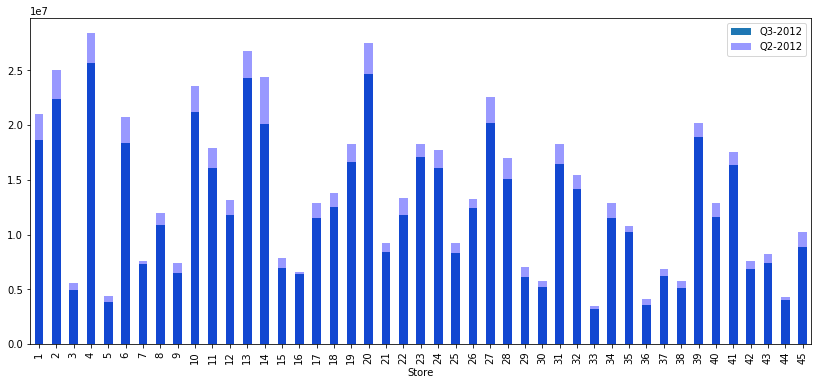

In [270]:
plt.figure(figsize=(14,6))
q2.plot(ax=q3.plot(kind='bar',legend=True),kind='bar',color='b',alpha=0.4,legend=True);
plt.legend(["Q3-2012", "Q2-2012"]);

In [269]:
rate=(q3-q2)/q2
quarterly_growth=rate.sort_values(ascending=False)
quarterly_growth.head()

Store
16   -0.027893
7    -0.038247
35   -0.046631
26   -0.060576
39   -0.063969
Name: Weekly_Sales, dtype: float64

In [271]:
print('Good quarterly growth rate in Q3 2012 is of Store '+str(quarterly_growth.idxmax()))


Good quarterly growth rate in Q3 2012 is of Store 16


Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [266]:
holiday_mean=datas.groupby("Holiday_Flag")["Weekly_Sales"].mean()

In [272]:
holiday_mean

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

In [273]:
non_holiday_sales=holiday_mean[0]

In [274]:
non_holiday_sales

1041256.3802088564

In [275]:
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

In [276]:
datas[datas["Date"].isin(Super_Bowl)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,year,month,day
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,4,2010,12,2
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,4,2011,11,2
105,1,2012-10-02,1802477.43,1,48.02,3.409,220.265178,7.348,4,2012,10,2
144,2,2010-12-02,2137809.50,1,38.49,2.548,210.897994,8.324,4,2010,12,2
196,2,2011-11-02,2168041.61,1,33.19,3.022,212.592862,8.028,4,2011,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6202,44,2011-11-02,307486.73,1,30.83,3.034,127.859129,7.224,4,2011,11,2
6254,44,2012-10-02,325377.97,1,33.73,3.116,130.384903,5.774,4,2012,10,2
6293,45,2010-12-02,656988.64,1,27.73,2.773,181.982317,8.992,4,2010,12,2
6345,45,2011-11-02,766456.00,1,30.30,3.239,183.701613,8.549,4,2011,11,2


In [277]:
 Super_Bowl_df=pd.DataFrame(datas[datas["Date"].isin(Super_Bowl)].groupby('year')['Weekly_Sales'].sum())

In [278]:
Super_Bowl_df

,Weekly_Sales
year,
2010,48336677.63
2011,47336192.79
2012,50009407.92


In [279]:
Labour_Day_df=pd.DataFrame(datas.loc[datas.Date.isin(Labour_Day)].groupby('year')['Weekly_Sales'].sum())

In [280]:
Labour_Day_df

,Weekly_Sales
year,
2010,45634397.84
2011,46763227.53
2012,48330059.31


In [281]:
 Thanksgiving_df=pd.DataFrame(datas.loc[datas.Date.isin(Thanksgiving )].groupby('year')['Weekly_Sales'].sum())

In [282]:
 Thanksgiving_df

,Weekly_Sales
year,
2010,65821003.24
2011,66593605.26


In [283]:
Christmas_df=pd.DataFrame(datas.loc[datas.Date.isin(Christmas)].groupby('year')['Weekly_Sales'].sum())

In [284]:
Christmas_df

,Weekly_Sales
year,
2010,40432519.00
2011,46042461.04


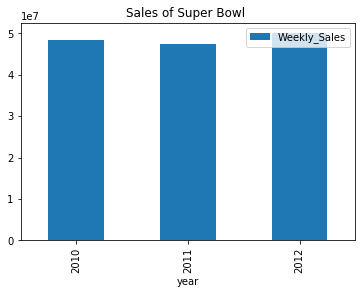

In [286]:
Super_Bowl_df.plot(kind='bar',title='Sales of Super Bowl ') 

In [287]:
{
    "max_Superbowl_sale":round(Super_Bowl_df["Weekly_Sales"].max(),2),
    "max_Labour_Day_sale":round(Labour_Day_df["Weekly_Sales"].max(),2),
    "max_Thanksgiving_sale":round(Thanksgiving_df["Weekly_Sales"].max(),2),
     "max_Christmas_sale" :round(Christmas_df["Weekly_Sales"].max(),2),
    "non_holiday_mean":round(non_holiday_sales,2)
    
}

{'max_Superbowl_sale': 50009407.92,
 'max_Labour_Day_sale': 48330059.31,
 'max_Thanksgiving_sale': 66593605.26,
 'max_Christmas_sale': 46042461.04,
 'non_holiday_mean': 1041256.38}

In [288]:
Holiday_max_sale={
    "max_Superbowl_sale":round(Super_Bowl_df["Weekly_Sales"].max(),2),
    "max_Labour_Day_sale":round(Labour_Day_df["Weekly_Sales"].max(),2),
    "max_Thanksgiving_sale":round(Thanksgiving_df["Weekly_Sales"].max(),2),
     "max_Christmas_sale" :round(Christmas_df["Weekly_Sales"].max(),2),
    "non_holiday_mean":round(non_holiday_sales,2)
    
}

In [289]:
Holiday_max_sales=max(Holiday_max_sale, key=Holiday_max_sale.get)

In [290]:
print(f' Holiday with maximum weekly sales is: {Holiday_max_sales}')

 Holiday with maximum weekly sales is: max_Thanksgiving_sale


Provide a monthly and semester view of sales in units and give insights

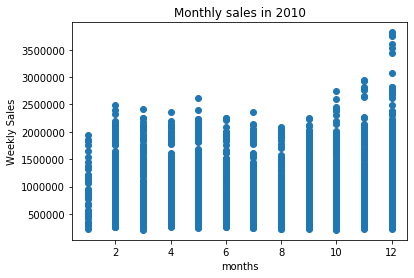

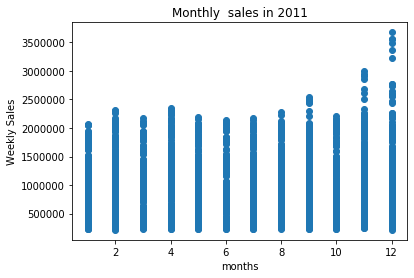

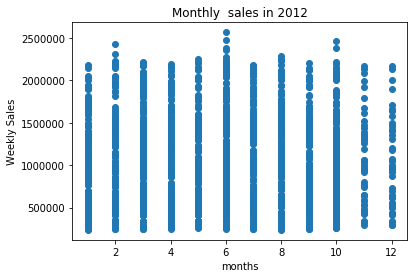

In [292]:
plt.scatter(datas[datas["year"]==2010]["month"],datas[datas["year"]==2010]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly sales in 2010")
plt.show()


plt.scatter(datas[datas["year"]==2011]["month"],datas[datas["year"]==2011]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly  sales in 2011")
plt.show()

plt.scatter(datas[datas["year"]==2012]["month"],datas[datas["year"]==2012]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly  sales in 2012")
plt.show()


In [293]:
yearly_sales=datas.groupby("year")[["Weekly_Sales"]].sum()

<Figure size 864x432 with 0 Axes>

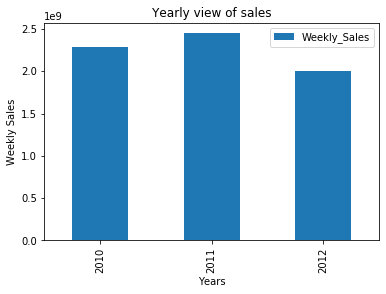

In [294]:
plt.figure(figsize=(12,6))
yearly_sales.plot(kind='bar')
plt.xlabel("Years")
plt.ylabel("Weekly Sales")
plt.title("Yearly view of sales");

In [295]:
datas["semester"]=[1 if i<=6 else 2 for i in datas["month"]]
   
        

In [296]:
datas

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,year,month,day,semester
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5,2,1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,4,2010,12,2,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1,2010,2,19,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1,2010,2,26,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2,2010,5,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,3,2012,9,28,2
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2,2012,5,10,1
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,4,2012,12,10,2
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4,2012,10,19,2


In [297]:
monthly_sales=datas.groupby("month")["Weekly_Sales"].sum()

In [298]:
monthly_sales

month
1     4.264263e+08
2     5.220257e+08
3     5.534864e+08
4     6.453239e+08
5     6.056966e+08
6     5.750180e+08
7     5.933139e+08
8     5.642317e+08
9     5.905323e+08
10    6.029189e+08
11    4.591693e+08
12    5.990761e+08
Name: Weekly_Sales, dtype: float64

In [299]:
monthly_sales.values

array([4.26426265e+08, 5.22025683e+08, 5.53486410e+08, 6.45323890e+08,
       6.05696592e+08, 5.75017964e+08, 5.93313937e+08, 5.64231700e+08,
       5.90532263e+08, 6.02918857e+08, 4.59169336e+08, 5.99076091e+08])

Text(0.5, 1.0, 'Monthly sales')

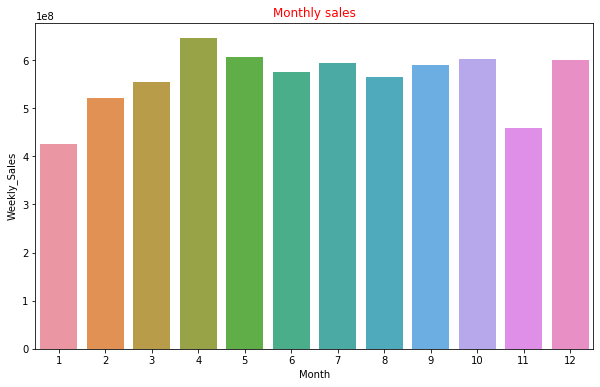

In [300]:
plt.figure(figsize=(10,6))
sns.barplot(x=monthly_sales.index,y=monthly_sales.values,data=datas)
plt.ylabel('Weekly_Sales', fontsize=10)
plt.xlabel('Month', fontsize=10)
plt.title('Monthly sales',fontsize=12, color='red')

In [301]:
sem_sales=datas.groupby("semester")["Weekly_Sales"].sum()

In [302]:
sem_sales

semester
1    3.327977e+09
2    3.409242e+09
Name: Weekly_Sales, dtype: float64

Text(0.5, 1.0, 'Semester sales')

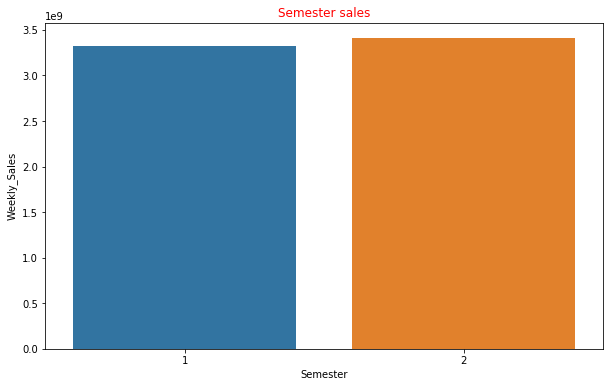

In [303]:
plt.figure(figsize=(10,6))
sns.barplot(x=sem_sales.index,y=sem_sales.values,data=datas)
plt.ylabel('Weekly_Sales', fontsize=10)
plt.xlabel('Semester', fontsize=10)
plt.title('Semester sales',fontsize=12, color='red')

 Impact on sales

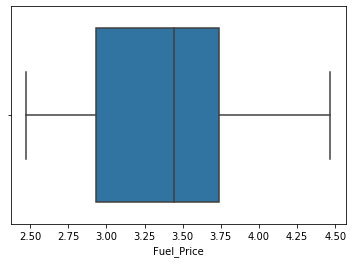

In [304]:
sns.boxplot(x="Fuel_Price",data=datas)

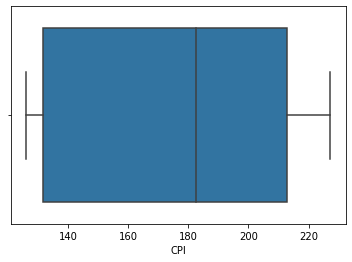

In [305]:
sns.boxplot(x="CPI",data=datas)

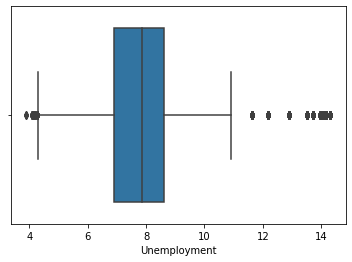

In [306]:
sns.boxplot(x='Unemployment',data=datas)

In [307]:
new_data=datas[(datas['Unemployment']<10.5) & (datas['Unemployment']>4.5) ]   #As from figure at <4.5 & >10.5 outliers present we will delete that

In [308]:
new_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,year,month,day,semester
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5,2,1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,4,2010,12,2,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1,2010,2,19,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1,2010,2,26,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2,2010,5,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,3,2012,9,28,2
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2,2012,5,10,1
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,4,2012,12,10,2
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4,2012,10,19,2


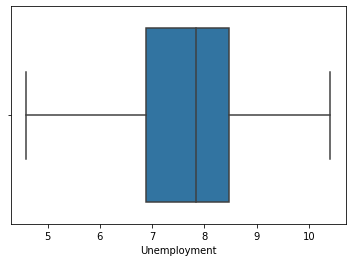

In [309]:
sns.boxplot(x='Unemployment',data=new_data)   

In [310]:
X=new_data[['Store','Fuel_Price','CPI','Unemployment','day','month','year']]

X

,Store,Fuel_Price,CPI,Unemployment,day,month,year
0,1,2.572,211.096358,8.106,2,5,2010
1,1,2.548,211.242170,8.106,2,12,2010
2,1,2.514,211.289143,8.106,19,2,2010
3,1,2.561,211.319643,8.106,26,2,2010
4,1,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...
6430,45,3.997,192.013558,8.684,28,9,2012
6431,45,3.985,192.170412,8.667,10,5,2012
6432,45,4.000,192.327265,8.667,10,12,2012
6433,45,3.969,192.330854,8.667,19,10,2012


In [311]:
y=new_data["Weekly_Sales"]
y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 5808, dtype: float64

In [312]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [313]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [314]:
X_test

array([[-1.43172531,  0.52996805, -1.19034045, ...,  0.95552129,
        -0.1498632 ,  0.07735279],
       [ 0.10725849,  0.52123641, -0.99521656, ...,  1.64013104,
         1.65004481,  0.07735279],
       [ 0.64590282, -1.29276238,  0.93010135, ...,  1.18372454,
         1.35006014, -1.17922438],
       ...,
       [ 1.10759796, -1.62674771,  0.90141753, ...,  0.15680992,
         0.75009081, -1.17922438],
       [-1.35477612,  1.26342605,  1.05781462, ..., -1.21240958,
        -0.1498632 ,  0.07735279],
       [ 0.10725849,  1.6825449 , -0.96732851, ...,  1.64013104,
        -1.0498172 ,  1.33392997]])

In [315]:
X_train

array([[ 0.87675039, -0.11835642, -1.15910485, ...,  0.49911479,
        -1.64978654,  1.33392997],
       [ 1.64624229,  0.75044204, -1.1432049 , ...,  0.84141967,
        -1.0498172 ,  1.33392997],
       [ 0.72285201,  0.38807886,  0.52402425, ..., -0.52779983,
         1.35006014,  0.07735279],
       ...,
       [ 1.41539472, -0.46762213,  0.55764582, ...,  0.15680992,
        -1.34980187,  1.33392997],
       [ 1.49234391,  0.86395339, -1.14870675, ..., -0.29959658,
         0.15012147,  1.33392997],
       [-1.20087774, -1.15087318,  0.39091422, ...,  0.15680992,
         0.75009081, -1.17922438]])

In [316]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()



In [317]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [318]:
y_pred = linreg.predict(X_test)

In [319]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [320]:

print('Accuracy:',linreg.score(X_train, y_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Accuracy: 12.811032352732067
Mean Absolute Error: 444445.49845912127
Mean Squared Error: 295296551740.2161
Root Mean Squared Error: 543411.9539909074


In [321]:
explained_variance_score(y_test, y_pred)

0.13418900628031094

New model to try for better accuracy

In [322]:
from sklearn.ensemble import RandomForestRegressor

In [323]:

rf = RandomForestRegressor(n_estimators = 400,max_depth=10,n_jobs=5)        
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print('Accuracy:',rf.score(X_train, y_train)*100)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Accuracy: 96.35525227330223
Mean Absolute Error: 79412.06525034389
Mean Squared Error: 21963780658.97271
Root Mean Squared Error: 148201.8240743774


In [328]:
print("So Random Forest Regressor is better model to predict Weekly sales of Walmart")

So Random Forest Regressor is better model to predict Weekly sales of Walmart
